## Homework 2

- Build and train a MLP Model to classify Mnist dataset

 1- MLP Network accepts 1D data. So we should flatten our 2D image, then print the dimension of the result arrays.
 
 2- Normalize data by rescaling them to (0,1) 
 
 3- Convert label arrays to 1-hot representation (`keras.utils.to_categorical`)
 
 4- Define Model
    * Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
    * Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
    * Outout Layer: Fully Connected + Softmax Activition
 
 
- Build and train a CNN+MLP deep learning model with Keras with followings specs for MNIST dataset:

    1. Conv2D(32, kernel_size=(3, 3), activation='relu')
    2. Conv2D(64, kernel_size=(3, 3), activation='relu')
    3. MaxPooling2D(pool_size=(2, 2))
    4. Dense(128, activation='relu')
    5. Dense(num_classes, activation='softmax')

    Also build another model with BatchNormalization and Dropout.
    Compare these two CNN + MLP models performance for test data

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.optimizers import RMSprop, SGD
from keras.initializers import RandomNormal

import numpy as np

Using TensorFlow backend.


### Practice Model

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134

### Part 1

In [1]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'


Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
# Reshape x_train and x_test
x_train = np.reshape(x_train,[-1, 28*28])
x_test = np.reshape(x_test,[-1, 28*28])
print(x_train.shape)

(60000, 784)


In [4]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

In [5]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
model = Sequential()
# Add the layers to model here.
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(512, activation='relu', kernel_initializer= RandomNormal(0,0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer= RandomNormal(0,0.01)))

In [7]:
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])

In [8]:
model.summary()
# Here we saved the raw model without any training. we will use it later.
model.save('raw_model.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


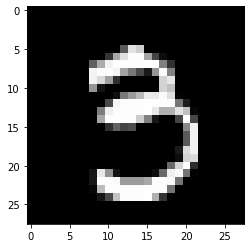

True label: 3
Predicted label: 6


In [9]:
# reload the model here:
model = load_model('raw_model.h5')
# generate a random number. (use numpy random.randint)
rand_num = np.random.randint(60000)
img = x_train[rand_num]
img = np.expand_dims(img, axis = 0)
predicted_label =model.predict(img, 1)
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray' )
plt.show()
# print its label
true_label = np.argmax(y_train[rand_num])
predicted_label = np.argmax(predicted_label)
print('True label:', true_label)
print('Predicted label:', predicted_label)

### Part 2

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()